# 파이썬 기초문법 & numpy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]


 ## 목적 
 
- 머신러닝 알고리즘을 구현하기 위한 최소 기초 문법 소개

- 데이터 시각화를 위한 `matplotlib` 소개 

- 행렬-벡터 계산을 위한 `numpy` 소개
- 주요 참고 문헌 
    - A Byte of Python<sup>[swaroop]</sup>
        
        - python 2.7 기준으로 작성
    
    - 처음 시작하는 파이썬Introducing Python, 한빛미디어<sup>[intro. python]</sup>

## 왜 파이썬인가?

- 공짜

- 많이 쓴다.

- 쉬운 문법?

- R과 비교하면?

> R을 배우지 않아도 아무런 문제가 되지 않지만, 많은 데이터 과학자와 데이터과학 프로젝트가 R을 사용하기 때문에 익숙해지는 것도 좋다. 그래야 R에 기반한 블로그 포스트, 예시, 또는 코드를 이해할 수 있기 때문이기도 하고, <span style="color:#348ABD">**다른 한편으로는 그래야 파이썬의 (상대적으로) 깨끗하고 우아한 면을 더욱 사랑하게 될 것이기 때문이다.**</span> <br/> - 조엘 그루스, 밑바닥부터 시작하는 데이터 과학, 한빛미디어

## 배경 

### 역사<sup>[wiki:python]</sup>

- 1991년 프로그래머인 귀도 반 로섬<sup>Guido van Rossum</sup>이 발표한 고급 프로그래밍 언어로, 플랫폼 독립적이며 인터프리터식, 객체지향적 언어

- python 2
    - 2000년 10월 16일 배포
    - python 3.x 가 발표되면서 구분을 위해 python 2.x 버전을 의미
    
- python 3 
    - 2008년 12월 3일 배포
    - 2.x대 버전의 파이썬과 하위호환성이 없음
    - 처음 시작한다면  무조건 python 3으로 시작



#### 들여쓰기

- 들여쓰기가 잘된 C 언어

```c
int factorial(int x) {
    if(x == 0)     {
        return 1;
    }     
    else     {
        return x * factorial(x - 1);
    }
}
```

- 같은 내용이 C 언어 

```c
int factorial(int x) {
if(x == 0) {return 1;} else
{return x * factorial(x - 1); } }
```

- C언어는 둘 다 허용, 하지만  파이썬은...

```python
def factorial(x):
    if x == 0:
        return 1
    else:
        return x * factorial(x - 1)
```

- 위 처럼 들여쓰지 않으면 에러!!



## 설치

### python 기본설치

- python.org에서 언어 패키지만 설치
- 모든 라이브러리를 `pip install`로 직접 다 설치
- 버츄얼 환경 직접 구성
<img src="imgs/python-logo.png" width="400">

<img src="imgs/pip-vs-ana.png" width="400">

### 서드파티 설치
- anaconda.org 에서 언어+각종 라이브러리를 패키지 제공
- 대부분 패키지가 기본 제공, `numpy`, `matplotlib`, `scipy`
- 버츄얼 환경 기본 제공
<img src="imgs/anaconda-logo.png" width="300">

### 클라우드 환경

- 무설치, Jupyter notebook으로 바로 사용가능

- Google Colaboratory, https://colab.research.google.com/notebook

- Microsoft Azure notebook, https://notebooks.azure.com/



### 아나콘다 설치

- https://www.anaconda.com/download/ 에서 윈도우용 설치 파일 다운로드

- 아나콘다 네비게이터 실행

<img src="imgs/anaconda-navi.png" width="800"/>

#### 가상환경 설정

- 가상환경virtualenvs
    - 파이썬에서 필요한 여러 라이브러리를 격리된 환경에 각각 여러개 만들어서 사용하는 환경
    - 여러 라이브러리들이 서로 버전 의존성이 있으므로 각 용도에 맞게 환경을 여러개 설정
    - env1 : `numpy` + `scipy` + `tensorflow`
    - env2 : `numpy` + `scipy` + `pytorch`
    
- 아나콘다 네비게이터에서 Environments 클릭

- 왼쪽에 가상환경, 오른쪽에 해당 가상환경에 설치된 패키지들이 리스트


<img src="imgs/anaconda-envs.png" width="800"/>

- 하단 Create를 클릭하고 파이썬 버젼과 환경의 이름을 지정하고 새로운 환경 생성

- 가상환경 파일이 복사되는 디폴트 폴더
    - 기본은 아나콘다가 설치된 폴더의 envs 폴더
    - CONDA_ENVS_PATH 환경변수에 default envs디렉토리 지정

- 가상환경 이름 옆에 play(세모) 버튼을 누르고 "Open Terminal"클릭 하면 커맨드 라인으로 가상환경 시작

- conda info 로 환경 설정을 확인

<pre>    
(nn) d:\Users\avman\lang\python\envs\nn>conda info

     active environment : nn
    active env location : D:\Users\avman\lang\python\envs\nn
            shell level : 1
       user config file : C:\Users\avman\.condarc
 populated config files : C:\Users\avman\.condarc
          conda version : 4.4.10
    conda-build version : 3.4.1
         python version : 3.6.4.final.0
       base environment : C:\Users\avman\Anaconda3  (writable)
           channel URLs : https://repo.continuum.io/pkgs/main/win-64
                          https://repo.continuum.io/pkgs/main/noarch
                          https://repo.continuum.io/pkgs/free/win-64
                          https://repo.continuum.io/pkgs/free/noarch
                          https://repo.continuum.io/pkgs/r/win-64
                          https://repo.continuum.io/pkgs/r/noarch
                          https://repo.continuum.io/pkgs/pro/win-64
                          https://repo.continuum.io/pkgs/pro/noarch
                          https://repo.continuum.io/pkgs/msys2/win-64
                          https://repo.continuum.io/pkgs/msys2/noarch
          package cache : C:\Users\avman\Anaconda3\pkgs
                          C:\Users\avman\AppData\Local\conda\conda\pkgs
       envs directories : D:\Users\avman\lang\python\envs
                          C:\Users\avman\Anaconda3\envs
                          C:\Users\avman\AppData\Local\conda\conda\envs
                          C:\Users\avman\.conda\envs
               platform : win-64
             user-agent : conda/4.4.10 requests/2.18.4 CPython/3.6.4 Windows/10 Windows/10.0.16299
          administrator : False
             netrc file : None
           offline mode : False


(nn) d:\Users\avman\lang\python\envs\nn>    
</pre>

#### 교재 노트북 실행을 위한 필요 패키지

- anaconda 네비게이터에서 설치
    - `numpy`, `scipy`, `matplotlib`, `pandas`, `plotly`, `sklearn-learn`, `sympy`, `graphviz`, `python-graphviz`, `jupyter`



## 프로그램 방식

### 대화식 인터프리터
```python
Python 3.6.0 (default, Jan 13 2017, 00:00:00) 
[GCC 4.8.4] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 3+1
4
>>> print("Hello World!")
Hello World!
>>> 
```

### 통합개발환경<sup>Itegrated Development Environment, IDE</sup> 사용

- 대형 앱을 개발 할 때 적합

- 코드 자동완성, 디버깅, 파일관리, 버전관리 등 개발에 필요한 편의 기능 제공

- Visual studio, https://docs.microsoft.com/en-us/visualstudio/python/installing-python-support-in-visual-studio

- PyCharm, https://www.jetbrains.com/pycharm-edu/



### Jupyter notebook

- 아나콘다 가상환경 쉘 프롬프트에서 "jupyter notebook" 으로 실행

- 또는 가상환경 이름 옆에 play(세모) 버튼을 누르고 "Open with Jupyter Notebook"클릭

- 서버에 웹브라우저로 접속하여 코드를 입력하고 결과를 HTML로 돌려 받음

- 셀<sup>cell</sup>이라 부르는 코드 블락에 코드를 입력하고 <span class="code-body">ctrl-enter</span>로 실행



## 시작에 앞서

### 주석
- '#' 문자 뒤에 따라오는 짧은 문장

```python 
print('hello world') # Note that print is a statement 
```

### print(x)

- 변수값을 출력하는 함수

- 아래코드는 "a is {}"라는 문장을 출력하는데 {}부분을 format()함수에 지정된 내용으로 교체 

```python
a = 10
print("a is {}".format(a))
# 결과: a is 10

a = 'Jo'
b = 27
print("My name is {}, and I'm {} years old.".format(a, b))
# 결과: My name is Jo, and I'm 27 years old
```



In [2]:
print('aaa')

aaa


## 프로그래밍의 구조

<img src="imgs/programming.png" width="600"/>

- 자료를 담는 그릇 : 변수, 자료구조

- 논리의 흐름 : 조건(==, !=, <, >), 코드구조(if, for, while)

- 효율성을 위한 도구 : 함수, 클래스

##  변수, 문자열, 숫자

### 변수

- 자료가 담긴 그릇에 붙인 이름표

#### 불변<sup>immutable</sup>

- 자료에 변화가 생기면 자료를 다시 만듬

- 숫자, 문자열, 튜플

```python
a = 7
b = a
print("a is {}".format(a))
print("b is {}".format(b))
# 결과 a is 7
# 결과 b is 7

a = 8
print("a is {}".format(a))
print("b is {}".format(b))
# 결과 a is 8
# 결과 b is 7
```

<img src="imgs/immutable.png" width="500">

#### 가변<sup>mutable</sup>

- 자료에 변화가 생기면 그 자료 자체를 변경

- 리스트, 딕셔너리

### 부울

- `True` 또는 `False`를 나타내는 자료형

```python
print(1 == True)
# 결과
True

print(True is 1)
# 결과
False
```



### 문자열

- ' ' 또는 " "로 둘러쌓인 문자

- " "인 문자열 안에 '가 들어갈 수 있고, '  '인 문자열 안에 "가 들어갈 수 있음

```python
print(" She said, "What is this?" ")

  File "<ipython-input-16-21032d3be853>", line 1
    print(" She said, "What is this?" ")
                          ^
SyntaxError: invalid syntax

print(" She said, \"What is this?\" ")
print(' She said, "What is this?" ')
# 결과  She said, "What is this?" 
```

#### 문자열 결합, 인덱싱, 길이

```python
a = 'My word!'
b = 'A gentleman caller!'
c = a + b
print(c)
print(c[3])
print(len(c))

# 결과
My word!A gentleman caller!
w
27
```


#### 여러줄 문자열

- 세 개의 따옴표로 표현

- 작은 따옴표든 큰 따옴표든 마음대로 사용

```python
a = '''This is a multi-line string. This is the first line.
This is the second line.
"What's your name?," I asked.
He said "Bond, James Bond."
'''
print(a)
```

#### 문자열 포맷팅<sup>[docs:string]</sup>

```python
# 소수점 이하 셋째 자리까지 부동 소숫점 숫자 표기 (0.333)
print ('{0:.3f}'.format(1.0/3))
# 결과 
0.333

# 밑줄(_)로 11칸을 채우고 가운데 정렬(^)하기 (___hello___)
print ('{0:_^11}'.format('hello'))
# 결과
___hello___

# 사용자 지정 키워드를 이용해 (Swaroop wrote A Byte of Python) 표기
print('{name} wrote {book}'.format(name='Swaroop', book='A Byte of Python'))
# 결과 
Swaroop wrote A Byte of Python
```



### 숫자

- 정수(5, 1000), 소수(3.14, 14.99), 부울형

- 다음 연산자 적용가능

| 연산자 | 설명   | 예 | 결과 |
|------|-------|------|------|
|   +    | 더하기 | 5+8 | 13 |
|   -    | 빼기 | 90-10 | 80 |
|   *    | 곱하기| 4\*7 | 28 |
|   /    | 부동소수점 나누기 | 7 / 2 | 3.5 |
|   //    |  정수나누기 | 7 // 2 | 3 |
|   %    | 너머지 | 7 % 3 | 1 |
|   \**    | 지수 | 3\**4 | 81 |

### 형변환

- 정수로 형변환 : <span class="code-body">int()</span>

- 소수로 형변환 : <span class="code-body">float()</span>

- 자동 형변환 : float > int > bool

```python
int(98.3)
# 결과 
98

float(13)
# 결과 
13.0

print(1+3.0)
# 결과 
4.0

print(1+True)
# 결과
2
```



## 자료구조

- 앞서 배운 기본 자료형을 모아서 관리하는 도구

- 즉 여러개의 값들이 열거되어 저장됨

- 튜플<sup>tuple</sup>, 리스트<sup>list</sup>, 사전<sup>dictionary</sup>

### 튜플

- 여러 개의 객체를 모아 담는 데 사용

- 정의 <span class="code-body">(,)</span>

- 불변, 수정이 불가능

- 단순 값들의 목록을 다루는 구문이나 사용자 정의 함수에서 주로 사용

```python
zoo = ('python', 'elephant', 'penguin')
print('Number of animals in the zoo is', len(zoo))
print(zoo[1])

# 결과
Number of animals in the zoo is 3
elephant

zoo[0] = 'tiger'
----------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-74-7e069550aff3> in <module>()
      1 zoo = ('python', 'elephant', 'penguin')
      2 
----> 3 zoo[0] = 'tiger'

TypeError: 'tuple' object does not support item assignment
```

- **항목 한개 짜리 튜플** 

```python
singleton = (2) # 그냥 2
singleton = (2 , )
```


### 리스트

- 순서대로 정리된 항목들을 담고 있는 자료 구조

- 정의 :  <span class="code-body">[ ]</span>

- 가변, 수정이 가능

```python
# This is my shopping list
shoplist = ['apple', 'mango', 'carrot', 'banana']
print(shoplist)
# 결과
['apple', 'mango', 'carrot', 'banana']

shoplist.append('rice')
print(shoplist)
# 결과
['apple', 'mango', 'carrot', 'banana', 'rice']

shoplist[0] = 'lego'
print(shoplist)
# 결과
['lego', 'mango', 'carrot', 'banana', 'rice']

del shoplist[1]
print(shoplist)
# 결과
['lego', 'carrot', 'banana', 'rice']

```

#### 리스트의 리스트

- 튜플, 리스트는 숫자, 문자 뿐 아니라 리스트, 사전 등 모든 자료 구조를 담을 수 있음

- 중첩된 시퀀스형은 연속된 [][] 로 인덱싱

```python
a = (1,2,3)
b = [a, 1,2,]


print(b)
# 결과 [(1, 2, 3), 1, 2]


print(b[0][1])
#결과 2 
```

#### 리스트를 문자열로 


```python
mylist = ['Brazil', 'Russia', 'India', 'China']
print(''.join(mylist))

#결과
BrazilRussiaIndiaChina
```



In [3]:
mylist = ['Brazil', 'Russia', 'India', 'China']
print(','.join(mylist))

Brazil,Russia,India,China


### 사전

- 문자 그대로 사전

- 키에 해당하는 값을 저장

- 정의 : <span class="code-body">{'key':'value' }</span>

- 항목 순서 유지 안됨

```python
ab = {  'Swaroop'    : 'swaroop@swaroopch.com',
        'Larry'      : 'larry@wall.org',
        'Matsumoto'  : 'matz@ruby-lang.org',
        'Spammer'    : 'spammer@hotmail.com'
    }
print(ab)
# 결과
{'Swaroop': 'swaroop@swaroopch.com', 'Matsumoto': 'matz@ruby-lang.org', 'Larry': 'larry@wall.org', 'Spammer': 'spammer@hotmail.com'}

print("Swaroop's address is", ab['Swaroop'])
# 결과
Swaroop's address is swaroop@swaroopch.com

del ab['Spammer'] 
print(ab)
# 결과
{'Swaroop': 'swaroop@swaroopch.com', 'Matsumoto': 'matz@ruby-lang.org', 'Larry': 'larry@wall.org'}
```



### 슬라이스<sup>slice</sup>

- [i]형식으로 요소에 접근하는 방식의 확장

- 인덱스는 음수도 가능

```python
shoplist = ['apple', 'mango', 'carrot', 'banana']

print(shoplist[3])
print(shoplist[-1])
# 결과
banana
banana

print(shoplist[2])
print(shoplist[-2])
# 결과
carrot
carrot

print(shoplist[1])
print(shoplist[-3])
# 결과
mango
mango

print(shoplist[0])
print(shoplist[-4])
# 결과
apple
apple
```

- <span class="code-body">A[start:end:offset]</span>

```python
A = [1,2,3,4,5,6,7,8,9,10]
print(A[3:9])
# 결과
[4, 5, 6, 7, 8, 9]

print(A[3:9:2])
# 결과
[4, 6, 8]

print(A[::1])
# 결과
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print(A[::-1])
# 결과
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

```



#### 슬라이스와 객체 복사

- 슬라이스로 얻은 리스트는 원래 리스트의 복사본

- 열거형의 복사본을 만들려면 반드시 슬라이스 연산자를 사용

```python
A = [1,2,3,4,5,6,7,8,9,10]
B = A
C = A[:]

A[0]=100
print("A is {}".format(A))
print("B is {}".format(B))
print("C is {}".format(C))

# 결과 
A is [100, 2, 3, 4, 5, 6, 7, 8, 9, 10]
B is [100, 2, 3, 4, 5, 6, 7, 8, 9, 10]
C is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

```



## 코드구조

### if-else

- 조건을 판별할 때 사용

```python
a = -3

if a > 0 :
    print("positive")
else :
    print("0 or negative")
```

#### 조건 판단을 위한 연산자

| 연산자 | 설명   | 
|------|-------|
|   ==    | 같다 |
|   !=    | 다르다 | 
|   <   | ~보다 작다 | 
|   <=    | ~보다 작거나 같다 | 
|   >    |  ~보다 크다 | 
|   >=    | ~보다 크거나 같다 |
|   in    | ~안에 있다 |

- 조건 판단에 = 쓰면 에러

```python
python = "쉽다"

if python = "쉽다":
    print("대단한데?")
else :
    print("금방 익숙해져~")

 File "<ipython-input-227-e1db640460af>", line 3
    if python = "쉽다":
              ^
SyntaxError: invalid syntax
```



### while-else

- 특정 조건이 참일 경우 계속해서 블록의 명령문들을 반복하여 실행

- 다른 언어에는 없는 while 조건이 참이 아닐 때 대응하는 else가 있음

#### break

- 반복 실행을 강제로 탈출하기 위해 사용

```python
i = 0
while i < 10 :
    print(i)
    i += 1
    
    # 루프를 정상적으로 돌고 i >= 10이 되어 
    # 즉, while 조건이 거짓이 되어 while문을 빠져나오면
    # else 블록이 실행되나
    # 이렇게 break를 걸어서 while 조건이 거짓이 아닌데도
    # while 블록을 탈출하면 else는 실행되지 않음
    if i == 5 :
        print('break')
        break
        
else :
    print('while-else')
    
# 결과
0
1
2
3
4
break
```    


### for-else

- 열거형 자료의 각 요소마다 코드 블록을 반복

```python
for i in range(1, 5):
    print(i)
else:
    print('The for loop is over')

# 결과
1
2
3
4
The for loop is over

```

#### 리스트에 대해서

```python
rabbits = ['flopsy', 'Mopsy', 'Cottontail', 'Peter']

for rabbit in rabbits :
    print(rabbit)
    
# 결과
flopsy
Mopsy
Cottontail
Peter
```

```python
for i, v in enumerate(rabbits):
    print(i,v)
    
# 결과
0 flopsy
1 Mopsy
2 Cottontail
3 Peter
```

#### 사전에 대해서

```python
scientists = {'newton':'f=ma', 'einstein':'e=mc^2',
                    'euler':'e^{i*pi}+1=0'}

for scientist in scientists :
    print(scientist)
# 결과
newton
einstein
euler

for formula in scientists.values() :
    print(formula)
# 결과
f=ma
e=mc^2
e^{i*pi}+1=0

for item in scientists.items() :
    print(item)
# 결과
('newton', 'f=ma')
('einstein', 'e=mc^2')
('euler', 'e^{i*pi}+1=0')
```



### 축약 또는 함축<sup>comprehension</sup>

- 자료구조를 만드는 빠르고 콤팩트한 방법

- 리스트, 사전 등에 적용

#### 리스트 컴프리헨션

- <span class="code-body">[1,2,3,4,5]</span>를 만드는 방법

```python
L = []
L.append(1)
L.append(2)
L.append(3)
L.append(4)
L.append(5)

L2 = []
for l in range(1, 6) :
    L2.append(l)
    
L3 = list(range(1,6))
```

- 축약 문법 : <span class="code-body">[표현식 for 항목 in 순회가능객체]</span>

```python
L = [n for n in range(1,6)]
```

- 빠르고, 다양한 조건을 걸어서 생성 가능

```python
# 아래 코드는 느리고 너저분하다.
L = []
for n in range(1,6):
    if n % 2 == 1 :
        L.append(n)
print(L)

# 깔끔하고 빠름 가독성은 좀 떨어짐
L = [n for n in range(1,6) if n % 2 == 1]
print(L)
```

- for 복수개 사용 가능

```python
# 3행 2열의 행렬 인덱스
matrix_index = [(row, col) for row in range(1,4) for col in range(1,3)]
print(matrix_index)
# 결과
[(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2)]

matrix_index2 = [ [(row, col) for row in range(1,4)] for col in range(1,3)]
print(matrix_index2)
# 결과
[[(1, 1), (2, 1), (3, 1)], [(1, 2), (2, 2), (3, 2)]]
```



### 코드 구조까지 알고 만들 수 있는 코드 조각

#### 1. 두 리스트에서 같은 위치의 요소를 각각 더하는 코드

In [4]:
A = [[1,2,3],[4,5,6],[7,8,9]]
B = [[11,22,33],[44,55,66],[77,88,99]]
C = [[0,0,0],[0,0,0],[0,0,0]]

# 그냥 더하면 리스트가 이어진다.
print('리스트 상태로 그냥 + 하면')
print(A+B)
print('\n')

# 루프를 돌면서 하나하나 더한다.
for i in range(len(A)) :
    for j in range(len(A[i])):
        C[i][j] = A[i][j]+B[i][j]

print('루프를 돌면서 각 요소를 다 더해주면')        
print(C)
print('\n')



리스트 상태로 그냥 + 하면
[[1, 2, 3], [4, 5, 6], [7, 8, 9], [11, 22, 33], [44, 55, 66], [77, 88, 99]]


루프를 돌면서 각 요소를 다 더해주면
[[12, 24, 36], [48, 60, 72], [84, 96, 108]]






#### 2. 위와 동일한 덧셈을 수행하면서 대각선 요소만 곱하기 2를 하는 코드

In [5]:
# 루프를 돌면서 하나하나 더한다.
for i in range(len(A)) :
    for j in range(len(A[i])):
        if i == j :
            C[i][j] = (A[i][j]+B[i][j]) * 2
        else :
            C[i][j] = A[i][j]+B[i][j]

print('루프를 돌면서 각 요소에 대해서 연산') 
print(C)
print('\n')


루프를 돌면서 각 요소에 대해서 연산
[[24, 24, 36], [48, 120, 72], [84, 96, 216]]




## 함수

-  재사용 가능한 이름이 붙여진 프로그램의 조각

-  <span class="code-body">def</span> 키워드를 통해 정의

```python
def say_hello():
    # block belonging to the function
    print('hello world')
# End of function

say_hello() # call the function
say_hello() # call the function again

# 결과
hello world
hello world
```

- 위 실습코드를 함수로 만들어 두면 두 리스트의 요솔르 더할때마다 간단히 사용할 수 있다.

### 매개변수<sup>parameters</sup>

- 함수로 넘겨지는 값들의 이름

- 수학 함수에서 독립변수에 해당

- 함수에 넘겨준 값들을 인자<sup>arguments</sup>

```python
def print_max(a, b):
    if a > b:
        print(a, 'is maximum')
    elif a == b:
        print(a, 'is equal to', b)
    else:
        print(b, 'is maximum')

# directly pass literal values
print_max(3, 3)

x = 5; y = 7

# pass variables as arguments
print_max(x, y)
```



In [2]:
A = [[1,2,3],[4,5,6],[7,8,9]]
B = [[11,22,33],[44,55,66],[77,88,99]]
C = [[0,0,0],[0,0,0],[0,0,0]]

def add_list(A, B, C) :
    # 루프를 돌면서 하나하나 더한다.
    for i in range(len(A)) :
        for j in range(len(A[i])):
            if i == j :
                C[i][j] = (A[i][j]+B[i][j]) * 2
            else :
                C[i][j] = A[i][j]+B[i][j]
    print(C)
    
add_list(A,B,C)   

A = [[11,21,31],[41,51,61],[71,81,91]]

# 달라진 A에 대해서 간단히 다시 계산할 수 있다.
add_list(A,B,C)   

[[24, 24, 36], [48, 120, 72], [84, 96, 216]]
[[44, 43, 64], [85, 212, 127], [148, 169, 380]]


#### 위치 인자

- 값을 순서대로 상응하는 매개변수에 복사하는 인자

- 인자의 의미와 순서를 기억하고 맞추지 않으면 이상한 결과가 나올 수 도 있음.

```python
def dc_marvel(superhero, actor, movie):
    return {'superhero':superhero, 'actor':actor, 'movie':movie}

print(dc_marvel('Batman', 'Ben Affleck', 'Justice League'))
print(dc_marvel('Robert Downey Junior', 'Iron man', 'The Avengers'))

#결과
{'movie': 'Justice League', 'superhero': 'Batman', 'actor': 'Ben Affleck'}
{'movie': 'The Avengers', 'superhero': 'Robert Downey Junior', 'actor': 'Iron man'}
```

#### 키워드 인자

- 매개변수의 이름을 지정하는 인자

- 순서 상과없이 이름만 맞추면 됨

```python
print(dc_marvel(actor='Ben Affleck',superhero='Batman', movie='Justice League'))

# 결과
{'movie': 'Justice League', 'superhero': 'Batman', 'actor': 'Ben Affleck'}
```

- 위치 인자와 키워드 인자로 함수를 호출하면 위치 인자가 먼저와야 한다.

```python
print(dc_marvel('Batman', movie='Justice League', actor='Ben Affleck'))
# 결과
{'movie': 'Justice League', 'superhero': 'Batman', 'actor': 'Ben Affleck'}


print(dc_marvel( movie='Justice League','Batman', actor='Ben Affleck'))

  File "<ipython-input-22-081c31e792db>", line 4
    print(dc_marvel( movie='Justice League','Batman', actor='Ben Affleck'))
                                           ^
SyntaxError: positional argument follows keyword argument

```



#### 기본 인수값

- 매개변수에 사용자가 값을 넘겨주지 않으면 자동으로 기본값을 사용하도록 하는 것

```python
def say(message='Hi!', times=1):
    print(message * times)

say()
say('Hello')
say('World', 5)
# 결과
Hi!
Hello
WorldWorldWorldWorldWorld

#--------------------------------------------------------
def say2(message, times=2):
    print(message * times) 

say2('say2')
# 결과
say2say2

#--------------------------------------------------------
def say3(message='Hi!', times):
     print(message * times)

  File "<ipython-input-45-706f1e5c3ed7>", line 13
    def say3(message='Hi!', times):
            ^
SyntaxError: non-default argument follows default argument
```



### 변수의 스코프<sup>scope</sup>

#### local

- 함수 안에서 변수를 선언하고 사용할 경우, 함수 밖에 있는 같은 이름의 변수들과 함수 안에 있는 변수들과는 서로 다른 변수가 되는데

- 이런 함수 안에서 선언된 변수를 지역변수라 함

- 변수가 영향을 미치는 범위를 변수의 스코프라 한다.

```python
x = 50

def func(x):
    print('x is', x)
    x = 2
    print('Changed local x to', x)

func(x)
print( 'x is still', x)

# 결과
x is 50
Changed local x to 2
x is still 50

L  = [1,3,4,]

def func2(x) :
    print('L is ', x)
    x[0] = 100
    print('Changed local L to', x)
    
func2(L)
print( 'L is ', L)

# 결과
L is  [1, 3, 4]
Changed local L to [100, 3, 4]
L is  [100, 3, 4]

```

- 함수라는 블록으로 한번 감싸진 블록 내부는 함수가 호출된 외부 블록과 격리되는 원리

- 가변 객체는 함수안에서 변경 가능



#### global

- 상위 블록에서 선언된 변수의 값을 변경하고 싶을 때, 해당 변수를 지역 변수가 아닌 전역(global) 변수로 사용할 것임을 알려 주는 키워드

- global 문을 사용하지 않으면, 함수 외부에서 선언된 변수의 값을 함수 내부에서 변경할 수 없음

- 전역변수를 사용하는 프로그램 방식은 지양


```python
x = 50

def func():
    global x

    print('x is', x)
    x = 2
    print('Changed local x to', x)

func()
print ('Value of x is', x)

# 결과
x is 50
Changed local x to 2
Value of x is 2
```



### return

- 함수가 종료될 때 어떤 값을 반환하는 용도로 사용

```python
def maximum(x, y):
    if x > y:
        return x
    elif x == y:
        return 'The numbers are equal'
    else:
        return y

print(maximum(2, 3))
print(maximum(2, 2))

# 결과
3
The numbers are equal

```

- 두 리스트의 요소를 더하는 함수가 결과를 리턴하게 하면......

In [10]:
A = [[1,2,3],[4,5,6],[7,8,9]]
B = [[11,22,33],[44,55,66],[77,88,99]]

def add_list(A, B) :
    C = [[0,0,0],[0,0,0],[0,0,0]]
    # 루프를 돌면서 하나하나 더한다.
    for i in range(len(A)) :
        for j in range(len(A[i])):
            C[i][j] = A[i][j]+B[i][j]
    return C
    
print(add_list(A,B))

A = [[11,21,31],[41,51,61],[71,81,91]]

# 달라진 A에 대해서 간단히 다시 계산할 수 있다.
print(add_list(A,B))

[[12, 24, 36], [48, 60, 72], [84, 96, 108]]
[[22, 43, 64], [85, 106, 127], [148, 169, 190]]


#### 나머지 % 연산자를 쓰지 않고 나머지를 구해주는 계산기



In [9]:
def 나누기(나눠지는수, 나누는수):
    몫 = 0
    
    while 나눠지는수 >= 나누는수 :
        나눠지는수 = 나눠지는수 - 나누는수
        몫 = 몫 + 1
    else :
        print("{} / {} = {}...{}".format(나누는수*몫, 나누는수, 몫, 나눠지는수))
        
나누기(985,23)
print(divmod(985,23))
print(int(985/23), 985%23)
print('\n')

나누기(785,342)
print(divmod(785,342))
print(int(785/342), 785%342)
print('\n')

나누기(324,17)
print(divmod(324,17))
print(int(324/17), 324%17)
print('\n')

# BUG!!
나누기(17, 30)

966 / 23 = 42...19
(42, 19)
42 19


684 / 342 = 2...101
(2, 101)
2 101


323 / 17 = 19...1
(19, 1)
19 1


0 / 30 = 0...17


## 모듈

- python 코드를 하나의 파일에 묶어 놓은 덩어리

- 함수 여러개를 하나의 파일에 작성해서 report.py 라는 파일로 저장

- 다른 파일 또는 커맨드 쉘에서 <span class="code-body">import report</span>으로 f.py안의 함수들을 불러 올 수 있음

- report.py는 이제 모듈

### 모듈 임포드

```python
# report.py를 다음처럼 작성해서 현재 폴더에 저장
def get_description():
    """Return random weather, just like the pros"""
    from random import choice
    possibilities = ['rain', 'snow', 'fog', 'sun']
    return choice(possibilities)
```

- 현재 notebook 셀에서

```python
import report

print(report.get_description())

```

- 임포트 후에 <span class="code-body">moduelname.function</span>으로 사용

### 다른 이름으로 모듈임포트

- 긴 모듈이름을 대신해서 별칭으로 모듈을 임포트 

```python
import numpy as np

np.sqrt(2)
```

### 필요한 것만 임포트

- <span class="code-body">sqrt()</span>을 쓰고 싶을 때 

```python
# 그냥 쓰면 에러
sqrt(2)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-267-40e415486bd6> in <module>()
----> 1 sqrt(2)

NameError: name 'sqrt' is not defined

# 다음처럼 math 모듈안에 있는 sqrt함수를 
# math 모듈을 임포트하고 math.sqrt로 접근하는 것이 아니라
# sqrt를 바로 임포트
from math import sqrt

sqrt(2)
```

##  클래스

- 객체지향 프로그래밍 : 함수와 자료를 하나의 덩어리로 묶어 "객체"라는 자료로 다루는 프로그램 방식 

- 다음처럼 객체를 생각할 수 있다.

- 사람
    - 속성(필드) : 이름, 키, 몸무게
    - 기능(메소드) : 걷는다, 먹는다, 잔다
    
- 더하기 
    - 속성(필드) : 숫자 2개, 1+2로 정의된 더하기에서 1과 2는 속성
    - 기능(메소드) : 두 숫자를 더한다.
    
- 함수는 기능만을 정의하고 기능에 필요한 정보는 외부에서 넘겨 받는다.

- 하지만 객체는 클래스라고 하는 형식으로 정의되어 자료와 기능을 동시에 가짐

```python
# 사람이 가지는 속성과 기능을 함께 가지는 어떤 변수를 정의
class Person:
    def __init__(self, n, h, w):
        self.name = n
        self.height = h
        self.weight = w
        
    def speed(self):
        return self.height / self.weight

class Add:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def add(self):
        return self.a+self.b
```

In [7]:
class Person:
    def __init__(self, h, w):
        self.height = h
        self.weight = w

    def speed(self):
        return self.height / self.weight

# Person형 자료가 하나 만들어지면서 __init__함수가 실행되어 객체를 초기화 한다.
p1 = Person(170, 100)
p2 = Person(160, 50)

# 객체의 기능을 실행한다.
print(p1.speed())
print(p2.speed())


class Add:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def add(self):
        return self.a+self.b

plus = Add(10,20)
plus.add()    

1.7
3.2


30

- 클래스를 사용하여 마치 기본 자료형처럼 동작하는 객체를 만들 수 있다.

- 아래 코드는 클래스와 연산자 오버로딩이라는 기능을 사용하여 요소끼리 더하는 기능을 하는 리스트를 만든 것


In [32]:
# 요소끼리 더하는 기능이 있는 리스트
class Listadd :
    def __init__(self, A):
        self.A = A
        
    def __add__(self, B):
        """
        넘겨 받은 객체 B와 나 자신을 더해서 되돌린다.
        __add__ 함수에 내용을 적으면 a+b식으로 함수를 호출할 수 있다.
        즉, a+b , a.__add__(b) 는 같은 표현이다.
        """
        C = [[0,0,0],[0,0,0],[0,0,0]]
        # 루프를 돌면서 하나하나 더한다.
        for i in range(len(self.A)) :
            for j in range(len(self.A[i])):
                C[i][j] = self.A[i][j]+B[i][j]
        return C
    
    def __getitem__(self, item):
        """
        item에 지정한 번호로 인덱싱을 하게 한다.
        A[1] 이면 item은 1, A[2,2]이면 item은 (2,2)가 넘어온다.
        __add__와 마찬가지로 A[1], A.__getitem__(1)은 같은 표현이다.
        """
        if type(item) is int :
            return self.A[item]
        else :
            return self.A[item[0]][item[1]]
        
A = Listadd([[1,2,3],[4,5,6],[7,8,9]]) 
B = Listadd([[11,22,33],[44,55,66],[77,88,99]])

# 아래 둘은 같은 표현이다.
print(A[2][2])
print(A.__getitem__(2)[2])

# 아래 둘도 같은 표현이다.
print(A+B)
print(A.__add__(B))

9
9
[[12, 24, 36], [48, 60, 72], [84, 96, 108]]
[[12, 24, 36], [48, 60, 72], [84, 96, 108]]


## 정리

- python은 쉬운 언어인가?

    - 처음에는 쉽다.
    - pythonic 하기 하기는 점점 어려워짐<sup>[docs:zen]</sup>
    - 필요한 만큼만 알고 적절히 사용



## matplotlib 

- Numpy 배열을 기반으로 만들어진 다중 플랫폼 데이터 시각화 라이브러리

- 예제 레퍼런스 : 파이썬 데이터 사이언스 핸드북<sup>[jakevdp]</sup>

### 매트랩<sup>MATLAB</sup> 스타일과 객체지향 스타일

- 그림 figure : 그래프의 축, 텍스트, 레이블 등 모든 요소를 포함하는 객체

- 축 axes : 시각화를 형성하는 플롯 요소

- 위 두 요소를 암시적으로 생성 :  매트랩 스타일

- 명시적 변수로 생성 : 객체지향 스타일

```python
import matplotlib.pyplot as plt

plt.plot(...) # matlab style, 내부적으로 figure, axes 만들어짐

fig = plt.figure()
ax  = plt.axes()    # figure, axis를 변수로 할당
ax.plot(...)
```

### 기본 플로팅

- x, y 값을 가지고 2차원 평면에 플롯

- <span class="code-body">plot(x, y, options...)</span> 형식

In [8]:
x = np.linspace(0,10,100)
print(x)

[ 0.      0.101   0.202   0.303   0.404   0.5051  0.6061  0.7071  0.8081  0.9091  1.0101  1.1111  1.2121  1.3131  1.4141  1.5152  1.6162  1.7172
  1.8182  1.9192  2.0202  2.1212  2.2222  2.3232  2.4242  2.5253  2.6263  2.7273  2.8283  2.9293  3.0303  3.1313  3.2323  3.3333  3.4343  3.5354
  3.6364  3.7374  3.8384  3.9394  4.0404  4.1414  4.2424  4.3434  4.4444  4.5455  4.6465  4.7475  4.8485  4.9495  5.0505  5.1515  5.2525  5.3535
  5.4545  5.5556  5.6566  5.7576  5.8586  5.9596  6.0606  6.1616  6.2626  6.3636  6.4646  6.5657  6.6667  6.7677  6.8687  6.9697  7.0707  7.1717
  7.2727  7.3737  7.4747  7.5758  7.6768  7.7778  7.8788  7.9798  8.0808  8.1818  8.2828  8.3838  8.4848  8.5859  8.6869  8.7879  8.8889  8.9899
  9.0909  9.1919  9.2929  9.3939  9.4949  9.596   9.697   9.798   9.899  10.    ]


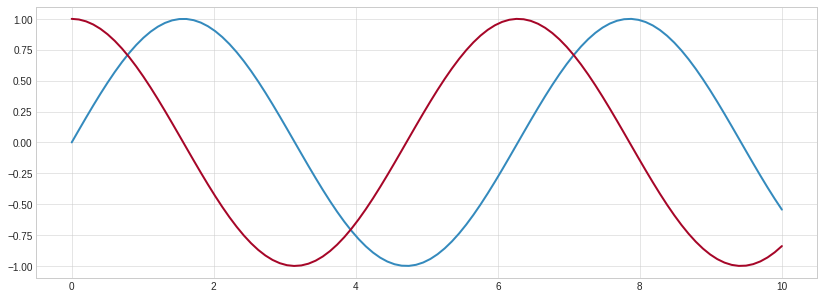

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (14,5)

x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

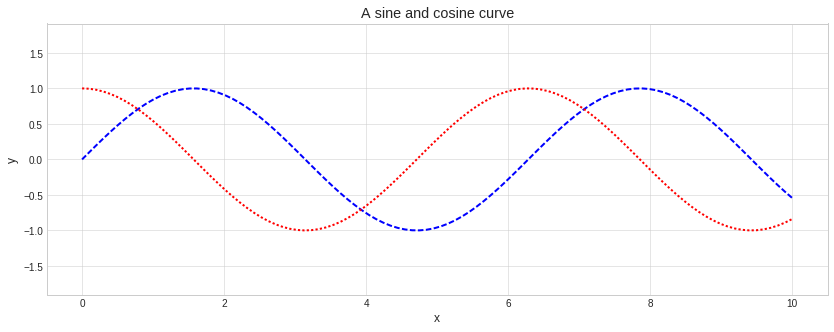

In [10]:
# 그래프의 색깔과 스타일
plt.plot(x, np.sin(x), '--', color="blue")
plt.plot(x, np.cos(x), ':', color="red")

# x, y 축의 범위를 재설정하고 각 축의 스케일을 동일하게 설정
plt.xlim([-1, 11])
plt.ylim([-1.5, 1.5])
plt.axis('equal')

# x, y 축에 레이블, 타이틀
plt.title('A sine and cosine curve')
plt.xlabel('x')
plt.ylabel('y');

### 등고선 플로팅

- $n$ 변수 실함수 그래프 플롯

- <span class="code-body">numpy.meshgrid</span>을 이용해서 $xy$평면에 적절히 그리드를 생성

```python
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 5)
X, Y = np.meshgrid(x, y)

print(X)
[[ 0.    0.25  0.5   0.75  1.  ]
 [ 0.    0.25  0.5   0.75  1.  ]
 [ 0.    0.25  0.5   0.75  1.  ]
 [ 0.    0.25  0.5   0.75  1.  ]
 [ 0.    0.25  0.5   0.75  1.  ]]
 
print(Y)
[[ 0.    0.    0.    0.    0.  ]
 [ 0.25  0.25  0.25  0.25  0.25]
 [ 0.5   0.5   0.5   0.5   0.5 ]
 [ 0.75  0.75  0.75  0.75  0.75]
 [ 1.    1.    1.    1.    1.  ]]
 ```
 
 - 위 상태에서 <span class="code-body">X[0,0], Y[0,0]</span> 는 <span class="code-body">(0,0)</span>, <span class="code-body">X[0,1], Y[0,0]</span>는 <span class="code-body">(0.25, 0)</span>이 되는 식

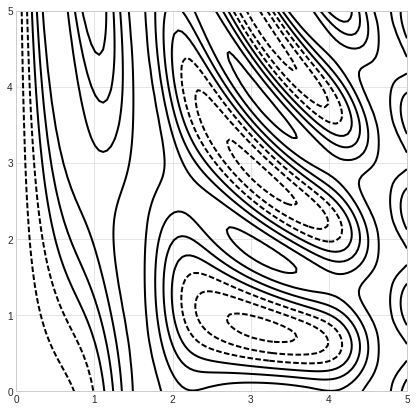

In [11]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (7,7)

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# 2변수 실함수를 정의
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)

# [0,5]x[0,5] 영역을 생성
X, Y = np.meshgrid(x, y)

# 리턴되는 Z도 X, Y와 같은 shape을 가짐
Z = f(X, Y)

# 흑백 그림에서 음의 값은 점선으로 표시
plt.contour(X, Y, Z, colors='black');

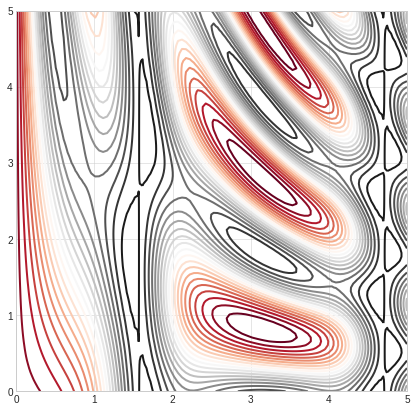

In [12]:
plt.rcParams["figure.figsize"] = (7,7)

# 등고선을 위한 level을 20개로 컬러맵을 RedGray로
plt.contour(X, Y, Z, 20, cmap='RdGy');

# 파이썬 넘파이python numpy<sup>[quick numpy]</sup> 

## ndarray

- numpy에서 제공하는 메인 객체인 배열

-  다차원 배열<sup>multidimensional array</sup>로써 1차원 배열(벡터), 2차원 배열(행렬), 3차원 배열(큐브), 4차원 배열(큐브가 여러개 모인것) 등등 계속 차원을 늘릴수 있음

- 속성

    - <span class="code-body">ndarray.ndim</span>  : 배열 축<sup>axis</sup>의 개수
    - <span class="code-body">ndarray.shape</span> : 배열의 각 축방향 차원
    - <span class="code-body">ndarray.dtype</span> : 배열 요소들의 자료형
    

### 생성
- 생성은 행우선 방식으로 [ ]로 적어주면 됨

$$
\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
$$

```python
import numpy as np

A = np.array([[1,2],[3,4]])

# 랜덤으로 생성
B = np.random.rand(10)
C = np.random.rand(25).reshape(5,-1)
D = np.random.randint(1, 11, 9).reshape(3,3)
```

In [13]:
A = np.array([[1,2],[3,4]])

# 랜덤으로 생성
B = np.random.rand(10)
C = np.random.rand(25).reshape(5,-1)
D = np.random.randint(1, 11, 9).reshape(3,3)

print(A)
print("\n")

print(B)
print("\n")

print(C)
print("\n")

print(D)

[[1 2]
 [3 4]]


[0.2808 0.7536 0.6537 0.7796 0.3055 0.2448 0.2685 0.7039 0.1027 0.7646]


[[0.8414 0.7271 0.2514 0.0778 0.3691]
 [0.6821 0.6194 0.759  0.2532 0.8755]
 [0.2295 0.5218 0.9514 0.5744 0.668 ]
 [0.6056 0.7415 0.5532 0.125  0.0834]
 [0.7663 0.2454 0.2993 0.6772 0.5039]]


[[3 5 1]
 [2 7 5]
 [6 4 7]]


In [5]:
import numpy as np
C = np.random.rand(25).reshape(5,-1)
print(C.shape)
print('-'*30)

a = np.array([1,2,3,4])
print(a.shape)
print(a)
print('-'*30)

a = a.reshape(-1,1)
print(a.shape)
print(a)

(5, 5)
------------------------------
(4,)
[1 2 3 4]
------------------------------
(4, 1)
[[1]
 [2]
 [3]
 [4]]


### 벡터로써의 ndarray

- 1차원 <span class="code-body">ndarray</span>는 축이 1개 즉, 

```python
a = np.array([1,2,3,4])
```

의 <span class="code-body">shape</span>는 <span class="code-body">(4,)</span>, **<span class="code-body">(1,4)</span>가 아님을 주의**

- 열벡터로 만들고 싶으면

```python
a.reshape(-1,1) #index에 -1을 지정하면 남은 요소를 자동으로 배열
```

- 행이나 열 하나를 가지는 행렬과 동일

In [14]:
a = np.array([1,2,3,4])
print(a.shape)
print(a)

a = a.reshape(-1,1)
print(a.shape)
print(a)

(4,)
[1 2 3 4]
(4, 1)
[[1]
 [2]
 [3]
 [4]]


### axis

- 배열의 요소가 늘어선 방향

- 0부터 번호가 증가, 새롭개 생긴 axis가 0번

<img src="imgs/linalg08.png" width="800"/>

- newaxis

```python
A = np.arange(10)
print("A, {}".format(A.shape))
print(A)
print('\n')

print("A[np.newaxis, :], {}".format(A[np.newaxis, :].shape))
print(A[np.newaxis, :])
print('\n')

print("A[ :, np.newaxis], {}".format(A[ :, np.newaxis].shape))
print(A[ :, np.newaxis])
```

In [7]:
A = np.arange(10)
print("A, {}".format(A.shape))
print(A)
print('\n')

print("A[np.newaxis, :], {}".format(A[np.newaxis, :].shape))
print(A[np.newaxis, :])
print('\n')

print("A[ :, np.newaxis], {}".format(A[ :, np.newaxis].shape))
print(A[ :, np.newaxis])

A, (10,)
[0 1 2 3 4 5 6 7 8 9]


A[np.newaxis, :], (1, 10)
[[0 1 2 3 4 5 6 7 8 9]]


A[ :, np.newaxis], (10, 1)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


### ndarray를 이용한 행렬 연산

#### 어레이의 합, 차

- 기본 +, -  연산자를 그냥 쓰면 됨

- 그 자체로 행렬연산

In [16]:
A = np.array([[1,3,4], [5,3,4], [4,5,2]])
B = np.array([[5,7,3], [2,1,0], [5,6,3]])

print("A")
print(A)
print('\n')

print("B")
print(B)
print('\n')

print("A+B")
print(A+B)
print('\n')

print("A-B")
print(A-B)

A
[[1 3 4]
 [5 3 4]
 [4 5 2]]


B
[[5 7 3]
 [2 1 0]
 [5 6 3]]


A+B
[[ 6 10  7]
 [ 7  4  4]
 [ 9 11  5]]


A-B
[[-4 -4  1]
 [ 3  2  4]
 [-1 -1 -1]]


#### 어레이의 상수배와 곱


In [17]:
print("3A")
print(3*A)
print("\n")

print("A*3")
print(A*3)

3A
[[ 3  9 12]
 [15  9 12]
 [12 15  6]]


A*3
[[ 3  9 12]
 [15  9 12]
 [12 15  6]]


### ndarray 인덱싱

#### 축하나에 대한 인덱싱

- 배열의 요소에 접근하기 위해서는 인덱스를 사용

- 인덱스는 0부터 시작

```python
A = np.array([1,2,3,4,5,6,7,8,9,10]) 
A[0:3] #A[시작인덱스:끝인덱스]->[1,2,3]
```

- 끝 인덱스는 포함되지 않음을 주의

- 다음과 같은 수학적 연속구간을 구현하기 위함

$$
[a, b), [b, c), [c, d)
$$

- 스탭 : <span class="code-body">A[start:stop:step]</span>
    - start(포함)에서 stop(미포함)까지 step씩 건너 뛰면서

In [18]:
A = np.array([1,2,3,4,5,6,7,8,9,10]) 

print("A[0:3] : {}".format(A[0:3]))
print("\n")

print("A[0::2] : {}".format(A[0::3]))
print("\n")

print("A[::-1] : {}".format(A[::-1]))

A[0:3] : [1 2 3]


A[0::2] : [ 1  4  7 10]


A[::-1] : [10  9  8  7  6  5  4  3  2  1]


#### 2축 이상에 대한 인덱싱

$$
\mathbf{C} = \begin{bmatrix}
0 & 1 & 2 & \color{OrangeRed}{3 }& \color{OrangeRed}{4} \\
5 & 6 & 7 & \color{OrangeRed}{8} & \color{OrangeRed}{9} \\
10 & 11 & \color{RoyalBlue}{12} & \color{OrangeRed}{13} & \color{OrangeRed}{14} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\color{Green}{45} & 46 & \color{Green}{47} & 48  & \color{Green}{49}
\end{bmatrix}
$$

- 3행 3열 요소
```python
C[2,2] # 12
```

- 1행에서 3행까지~4열에서 5열까지 : 각 인덱스 자리에서 "시작인덱스:끝인덱스" 문법 적용
 ```python
C[0:3, 3:5]
 ```


In [15]:
C = np.arange(50).reshape(10,5)
print("C")
print(C)
print("\n")

print("C[2,2]")
print(C[2,2])
print("\n")

print("C[0:3, 4:5]")
print(C[0:3, 3:5])
print("\n")


print("C의 모든행에 대해서 1열을 추출")
print("C[:,0].reshape(-1,1)")
print(C[:,0].reshape(-1,1))
print("\n")

print("C의 마지막 행에서 홀수 열만 추출")
print("print(C[-1,:][0::2])")
print(C[-1,:][0::2])
print("\n")

print("C의 짝수만 뽑아서 4x6행렬로 만들기")
print("C.reshape(1,-1)[0][2:50:2].reshape(4,-1)")
print(C.reshape(1,-1)[0][2:50:2].reshape(4,-1))

C
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]


C[2,2]
12


C[0:3, 4:5]
[[ 3  4]
 [ 8  9]
 [13 14]]


C의 모든행에 대해서 1열을 추출
C[:,0].reshape(-1,1)
[[ 0]
 [ 5]
 [10]
 [15]
 [20]
 [25]
 [30]
 [35]
 [40]
 [45]]


C의 마지막 행에서 홀수 열만 추출
print(C[-1,:][0::2])
[45 47 49]


C의 짝수만 뽑아서 4x6행렬로 만들기
C.reshape(1,-1)[0][2:50:2].reshape(4,-1)
[[ 2  4  6  8 10 12]
 [14 16 18 20 22 24]
 [26 28 30 32 34 36]
 [38 40 42 44 46 48]]


### ndarray 모양 바꾸기, 전치

- <span class="code-body">reshape(a)</span> : 어레이의 모양을 <span class="code-body">a</span>에 지정된 모양으로 바꿈

- <span class="code-body">transpose(axis)</span> : 행렬의 전치와 같은 역할, 3개축 이상에서도 같은 논리로 동작

<img src="imgs/3D-array.png" width="350">

In [16]:
A = np.arange(1, 19)
print("A")
print(A)
print("\n")

A = A.reshape(2, 3, 3)
print("A")
print(A)
print("\n")

A
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


A
[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]]




In [17]:
B = A[0,:]
print("B=A[0,:]")
print(B)
print("B.T")
print(B.T)
print("\n")

B=A[0,:]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B.T
[[1 4 7]
 [2 5 8]
 [3 6 9]]




<img src="imgs/3D-array.png" width="350">

In [18]:
print("A.transpose(2, 0, 1)")
print(A.transpose(2, 0, 1))
print("\n")

A.transpose(2, 0, 1)
[[[ 1  4  7]
  [10 13 16]]

 [[ 2  5  8]
  [11 14 17]]

 [[ 3  6  9]
  [12 15 18]]]




<img src="imgs/3D-array.png" width="350">

In [19]:
print("A.transpose(1, 2,  0)")
print(A.transpose(1, 2,  0))
print("\n")

A.transpose(1, 2,  0)
[[[ 1 10]
  [ 2 11]
  [ 3 12]]

 [[ 4 13]
  [ 5 14]
  [ 6 15]]

 [[ 7 16]
  [ 8 17]
  [ 9 18]]]




<img src="imgs/3D-array.png" width="350">

In [22]:
print("A.transpose(2, 1, 0)")
print(A.transpose(2, 1, 0))
print("\n")

A.transpose(2, 1, 0)
[[[ 1 10]
  [ 4 13]
  [ 7 16]]

 [[ 2 11]
  [ 5 14]
  [ 8 17]]

 [[ 3 12]
  [ 6 15]
  [ 9 18]]]




<img src="imgs/3D-array.png" width="350">

In [23]:
print("A.transpose(2, 1, 0)[::-1]")
print(A.transpose(2, 1, 0)[::-1])
print("\n")

A.transpose(2, 1, 0)[::-1]
[[[ 3 12]
  [ 6 15]
  [ 9 18]]

 [[ 2 11]
  [ 5 14]
  [ 8 17]]

 [[ 1 10]
  [ 4 13]
  [ 7 16]]]




### ndarray 분해, 결합

$$
\mathbf{A} = \begin{bmatrix} \color{RoyalBlue}{1}&\color{RoyalBlue}{3}&\color{RoyalBlue}{4} \\ 
\color{RoyalBlue}{5}&\color{RoyalBlue}{3}&\color{RoyalBlue}{4} \\ \color{RoyalBlue}{4}&\color{RoyalBlue}{5}&\color{RoyalBlue}{2} \end{bmatrix}, \qquad
\mathbf{B} = \begin{bmatrix} \color{OrangeRed}{5}&\color{OrangeRed}{7}&\color{OrangeRed}{3} \\ 
\color{OrangeRed}{2}&\color{OrangeRed}{1}&\color{OrangeRed}{0} \\ 
\color{OrangeRed}{5}&\color{OrangeRed}{6}&\color{OrangeRed}{3} \end{bmatrix}
$$

$$
\text{hstack}(\mathbf{AB}) = \begin{bmatrix} \color{RoyalBlue}{1}&\color{RoyalBlue}{3}&\color{RoyalBlue}{4}&\color{OrangeRed}{5}&\color{OrangeRed}{7}&\color{OrangeRed}{3} \\ \color{RoyalBlue}{5}&\color{RoyalBlue}{3}&\color{RoyalBlue}{4}&\color{OrangeRed}{2}&\color{OrangeRed}{1}&\color{OrangeRed}{0} \\ \color{RoyalBlue}{4}&\color{RoyalBlue}{5}&\color{RoyalBlue}{2}&\color{OrangeRed}{5}&\color{OrangeRed}{6}&\color{OrangeRed}{3} \end{bmatrix}
$$

$$
\text{vstack}(\mathbf{AB}) = \begin{bmatrix}
\color{RoyalBlue}{1}&\color{RoyalBlue}{3}&\color{RoyalBlue}{4} \\ 
\color{RoyalBlue}{5}&\color{RoyalBlue}{3}&\color{RoyalBlue}{4} \\ \color{RoyalBlue}{4}&\color{RoyalBlue}{5}&\color{RoyalBlue}{2} \\
\color{OrangeRed}{5}&\color{OrangeRed}{7}&\color{OrangeRed}{3} \\ 
\color{OrangeRed}{2}&\color{OrangeRed}{1}&\color{OrangeRed}{0} \\ 
\color{OrangeRed}{5}&\color{OrangeRed}{6}&\color{OrangeRed}{3}
\end{bmatrix}
$$

In [21]:
A = np.array([1,3,4,5,3,4,4,5,2]).reshape(3,3)
B = np.array([5,6,3,2,1,0,5,6,3]).reshape(3,3) 

D = np.hstack((A,B))
E = np.vstack((A,B))

print("hstack((A,B))")
print(D)
print("\n")

print("vstack((A,B))")
print(E)

hstack((A,B))
[[1 3 4 5 6 3]
 [5 3 4 2 1 0]
 [4 5 2 5 6 3]]


vstack((A,B))
[[1 3 4]
 [5 3 4]
 [4 5 2]
 [5 6 3]
 [2 1 0]
 [5 6 3]]


### 브로드캐스팅

- 브로트캐스팅은 Numpy에서 shape가 다른 배열 간에도 산술 연산이 가능하게 하는 메커니즘<sup>[aikorea numpy]</sup>

<img src="imgs/numpy_broadcasting.png" width="700">
<h5 align="center">http://www.scipy-lectures.org/intro/numpy/operations.html</h5>

- 숫자 브로드캐스팅

<img src="imgs/b-cast1.png" width="500">

In [25]:
A = np.zeros((4,3))

print("A")
print(A)
print("\n")

print("A+100")
print(A+100)

A
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


A+100
[[100. 100. 100.]
 [100. 100. 100.]
 [100. 100. 100.]
 [100. 100. 100.]]


- 열 브로드캐스팅

<img src="imgs/b-cast2.png" width="500">

In [26]:
c = np.array([100, 200, 300, 400]).reshape(4,1)

print("A")
print(A)
print("\n")

print("c")
print(c)
print("\n")

print("A+c")
print(A+c)

A
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


c
[[100]
 [200]
 [300]
 [400]]


A+c
[[100. 100. 100.]
 [200. 200. 200.]
 [300. 300. 300.]
 [400. 400. 400.]]


- 행 브로드캐스팅

<img src="imgs/b-cast3.png" width="550">

In [28]:
c = np.array([100, 200, 300]).reshape(1,3)

print("A")
print(A)
print("\n")

print("c")
print(c)
print("\n")

print(A+c)

A
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


c
[[100 200 300]]


[[100. 200. 300.]
 [100. 200. 300.]
 [100. 200. 300.]
 [100. 200. 300.]]


- 열과 행의 브로드캐스팅

<img src="imgs/b-cast4.png" width="500">

In [25]:
a = np.array([1,2,3,4]).reshape(-1,1)  # a의 shape는 (4,1)
b = np.array([5,6,7])      # b의 shape는 (3,)

print("a")
print(a)
print("\n")

print("b")
print(b)
print("\n")

# 열벡터와 1차원 어레이(행벡터)의 곱
print("a*b")
print(a*b)
print("\n")

print("a+b")
print(a+b)

a
[[1]
 [2]
 [3]
 [4]]


b
[5 6 7]


a*b
[[ 5  6  7]
 [10 12 14]
 [15 18 21]
 [20 24 28]]


a+b
[[ 6  7  8]
 [ 7  8  9]
 [ 8  9 10]
 [ 9 10 11]]


### 도움되는 함수들 

- `np.tile()` : 주어진 어레이를 반복

```python
A = np.arange(1,10)
B = np.tile(A,9).reshape(-1,9)
# 결과
# A : [1 2 3 4 5 6 7 8 9]
# B :
# [[1 2 3 4 5 6 7 8 9]
#  [1 2 3 4 5 6 7 8 9]
#  [1 2 3 4 5 6 7 8 9]
#  [1 2 3 4 5 6 7 8 9]
#  [1 2 3 4 5 6 7 8 9]
#  [1 2 3 4 5 6 7 8 9]
#  [1 2 3 4 5 6 7 8 9]
#  [1 2 3 4 5 6 7 8 9]
#  [1 2 3 4 5 6 7 8 9]]
```

- `np.flatten()` : n차원 어레이를 1차원 어레이로 만듬

```python
A = np.arange(9).reshape(3,3)
print(A)
#결과 : [[0 1 2]
#        [3 4 5]
#        [6 7 8]]

print(A.flatten())
#결과 : [0 1 2 3 4 5 6 7 8]

B = np.arange(8).reshape(2,2,2)
print(B)
#결과 : [[[0 1]
#         [2 3]]
#
#        [[4 5]
#         [6 7]]]
print(B.flatten())
#결과 : [0 1 2 3 4 5 6 7]
```

- `np.where()` : 조건에 맞는 요소의 인덱스를 되돌림 

```python
A = np.arange(9).reshape(3,3)
print(A)
#결과 : [[0 1 2]
#        [3 4 5]
#        [6 7 8]]
 
B = A.flatten()
print(B)
#결과 : [0 1 2 3 4 5 6 7 8]

print(np.where(A < 2))
#결과 : (array([0, 0]), array([0, 1]))

print(np.where(B < 2))
#결과 : (array([0, 1]),)

print(A[np.where(A < 2)])
#결과 : [0 1]

print(B[np.where(B < 2)])
#결과 : [0 1]
```

- `argmax`, `argmin` : 가장 큰(작은) 요소의 인덱스를 되돌림

```python
A = np.random.randint(0, 100, 9).reshape(3,3)
print( np.unravel_index(np.argmax(A, axis=None), A.shape) )
print(A)
```

In [34]:
A = np.random.randint(0, 100, 9).reshape(3,3)
print(A)

# axis 인자를 0, 1로 바꾸면서 결과 확인해보기
print(np.argmax(A, axis=None))
print( np.unravel_index(np.argmax(A, axis=None), A.shape) )

[[38 20 42]
 [ 7 46 48]
 [85 90 75]]
7
(2, 1)


- r\_ : 어레이를 열 또는 행방향으로 적층시킴

In [35]:
"""
[1,2,3]과 [4,5,6]을 그냥 가로 방향으로 연결
결과 : [1 2 3 4 5 6]
"""
print("np.r_[[1,2,3],[4,5,6]]")
print(np.r_[[1,2,3],[4,5,6]])
print("\n")

np.r_[[1,2,3],[4,5,6]]
[1 2 3 4 5 6]




In [36]:
"""
[1,2,3]과 [4,5,6]을 연결하는데 
'1, 2' : 연결하는 방향은 1번축 방향→(가로), (모양은) 2차원 배열이 되게
결과 : [[1 2 3 4 5 6]]
"""
print("np.r_['1,2',[1,2,3],[4,5,6]]")
print(np.r_['1,2',[1,2,3],[4,5,6]])
print("\n")

np.r_['1,2',[1,2,3],[4,5,6]]
[[1 2 3 4 5 6]]




In [37]:
"""
[1,2,3]과 [4,5,6]을 연결하는데 
'1, 2, 1' : 연결하는 방향은 1번축 방향→, 2차원 배열이 되게, 각 요소의 배열은 1번축 방향으로→
결과 : [[1 2 3 4 5 6]]
"""
print("np.r_['1,2,1',[1,2,3],[4,5,6]]")
print(np.r_['1,2,1',[1,2,3],[4,5,6]])
print("\n")

np.r_['1,2,1',[1,2,3],[4,5,6]]
[[1 2 3 4 5 6]]




In [38]:
"""
[1,2,3]과 [4,5,6]을 연결하는데 
'1, 2, 0' : 연결하는 방향은 1번축 방향→, 2차원 배열이 되게, 각 요소의 배열은 0번축 방향으로↓
결과 : [[1 4]
        [2 5]
        [3 6]]
np.c_[] 와 같음        
"""
print("np.r_['1,2,0',[1,2,3],[4,5,6]]")
print(np.r_['1,2,0',[1,2,3],[4,5,6]])
print("np.c_[[1,2,3],[4,5,6]]")
print(np.c_[[1,2,3],[4,5,6]])
print("\n")

np.r_['1,2,0',[1,2,3],[4,5,6]]
[[1 4]
 [2 5]
 [3 6]]
np.c_[[1,2,3],[4,5,6]]
[[1 4]
 [2 5]
 [3 6]]




In [39]:
"""
[1,2,3]과 [4,5,6]을 연결하는데 
'0, 2, 0' : 연결하는 방향은 0번축 방향↓, 2차원 배열이 되게, 각 요소의 배열은 0번축 방향으로↓
결과 : [[1]
        [2]
        [3]
        [4]
        [5]
        [6]]
"""
print("np.r_['0,2,0',[1,2,3],[4,5,6]]")
print(np.r_['0,2,0',[1,2,3],[4,5,6]])
print("\n")

np.r_['0,2,0',[1,2,3],[4,5,6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]




In [40]:
"""
[1,2,3]과 [4,5,6]을 연결하는데 
'0, 2, 1' : 연결하는 방향은 0번축 방향↓, 2차원 배열이 되게, 각 요소의 배열은 1번축 방향으로→
결과 : [[1 2 3]
        [4 5 6]]
"""
print("np.r_['0,2,1',[1,2,3],[4,5,6]]")
print(np.r_['0,2,1',[1,2,3],[4,5,6]])

np.r_['0,2,1',[1,2,3],[4,5,6]]
[[1 2 3]
 [4 5 6]]


### 코드 구조까지 알고 만들 수 있는 코드 조각을 numpy로 구현 해보기

#### 두 리스트에서 같은 위치의 요소를 각각 더하는 코드


In [28]:
A = [[1,2,3],[4,5,6],[7,8,9]]
B = [[11,22,33],[44,55,66],[77,88,99]]

# 넘파이를 쓰면...
C2 = np.array(np.asarray(A)+np.asarray(B))
print(C2)
print('\n')

[[ 12  24  36]
 [ 48  60  72]
 [ 84  96 108]]




#### 위와 동일한 덧셈을 수행하면서 대각선 요소만 곱하기 2를 하는 코드

In [29]:
# 넘파이를 이용하면
C2 = np.array(np.asarray(A)+np.asarray(B)) * (np.ones_like(np.asarray(A))+np.eye(*np.asarray(A).shape))
print(C2)

[[ 24.  24.  36.]
 [ 48. 120.  72.]
 [ 84.  96. 216.]]


## 참고문헌

1. [swaroop] A Byte of Python, Swaroop C H, http://byteofpython-korean.sourceforge.net/byte_of_python.html

2. [intro. python] 처음 시작하는 파이썬Introducing Python, 빌 루바노빅, 한빛미디어

3. [wiki:python] https://ko.wikipedia.org/wiki/파이썬

4. [docs:string] https://docs.python.org/3.4/library/string.html

5. [docs:zen] http://docs.python-guide.org/en/latest/writing/style/#zen-of-python

6. [jakevdp] 파이썬 데이터 사이언스 핸드북, 제이크 밴더플래스, 위키북스, https://jakevdp.github.io/PythonDataScienceHandbook/

7. [quick numpy] Numpy Quickstart tutorial, https://docs.scipy.org/doc/numpy-1.13.0/user/quickstart.html

8. [aikore numpy] Python Numpy Tutorial,  http://aikorea.org/cs231n/python-numpy-tutorial/#numpy-broadcasting

In [41]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item):not(.p-Menu-item)   
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #FF0000; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>